# M5 T02 Introducció al Test d'Hipòtesis i al Machine Learning

Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

## Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

#carreguem les llibreries necesaries per preparar i transformar el model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config


from itertools import zip_longest

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## DESCRIPCIÓ DEL DATASET 

In [2]:
#importem i obrim archiu .txt
archiu = open('./dataset/data_description.txt', mode='r')
data_description = archiu.read()
print(data_description)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
#importem el dataset i definim les columnes

colnames=['CRIM', 'ZN ', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./dataset/housing_data.csv', delimiter=",", decimal=".", encoding ='utf8', names=colnames, header=None)
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666.0,20.2,350.65,14.19,19.9
390,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11,15.1
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22,17.2
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    int32  
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    int32  
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
 13  MEDV     506 non-null    float32
dtypes: float32(12), int32(2)
memory usage: 27.8 KB


In [25]:
df.isna().sum().sort_values()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Identificació del model de distribució

L'objectiu és construir un model per predir la variable numèrica contínua 'MEDV' que correspon al valor mitjà dels habitatges ocupats pels seus propietaris (en milers de dòlars). Posteriorment s'haurà d'evaluar en el model en la mostra Test, i una vegada contrastada la seva validesa, aquest model hauria de ser extrapolable a la població de la mostra.

Per tant, el model que millor s'adapta al tipus de distribució de les dades, serà el model de regressió que, s'utilitza per a l'evaluació dels algorismes d'aprenentatge supervisat.

### Variables predictores

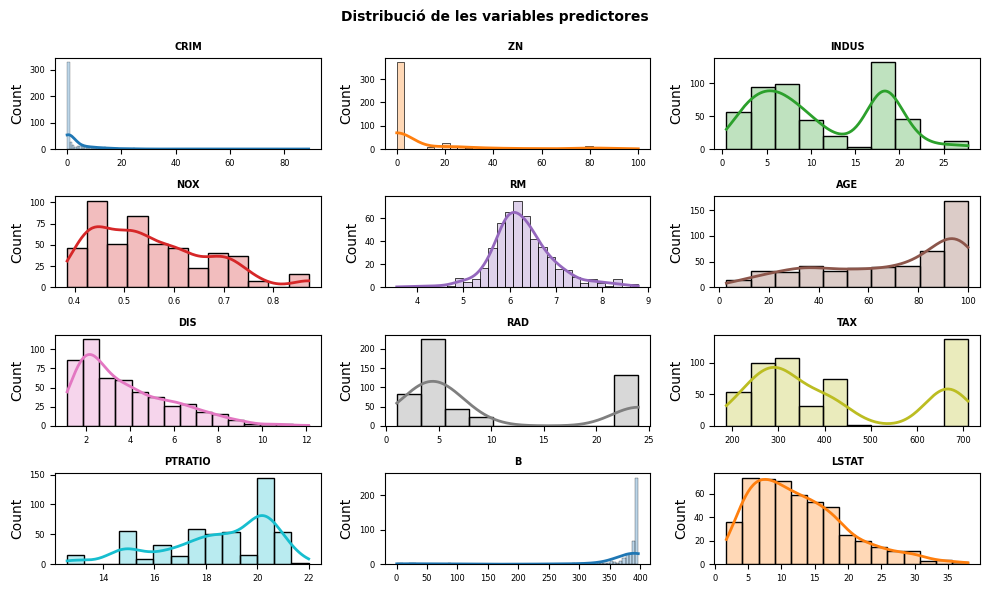

In [4]:
#Treïem la variable resposta del dataset i la binaria CHAS. Ho grafiquem.

df1 = df.drop(['MEDV', 'CHAS'],axis=1)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 6))
axes = axes.flat
columnas_numeric = df1.select_dtypes(include=['float32', 'int32']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df1,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les variables predictores', fontsize = 10, fontweight = "bold");

### Variable resposta 'MEDV'

És important estudiar la distribució de la variable resposta ya que és la que interesa predir.

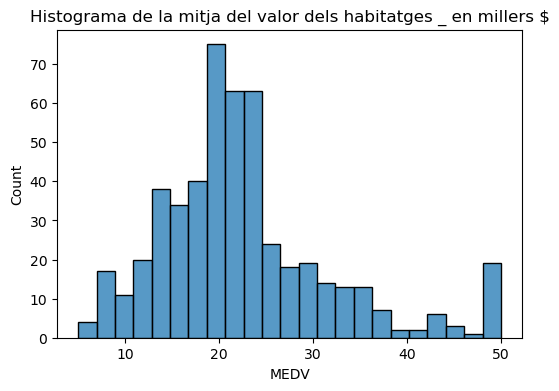

In [5]:
# Grafiquem per comprovar si les dades segueixen una distribuicó normal
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MEDV')

plt.title('Histograma de la mitja del valor dels habitatges _ en millers $');
plt.xlabel('MEDV');

Com l'objetiu del estudi es predir el preu mitja dels habitatges ocupats pels propietaris, caldrà análitzar cada variable en relación a la variable resposta 'MEDV'.

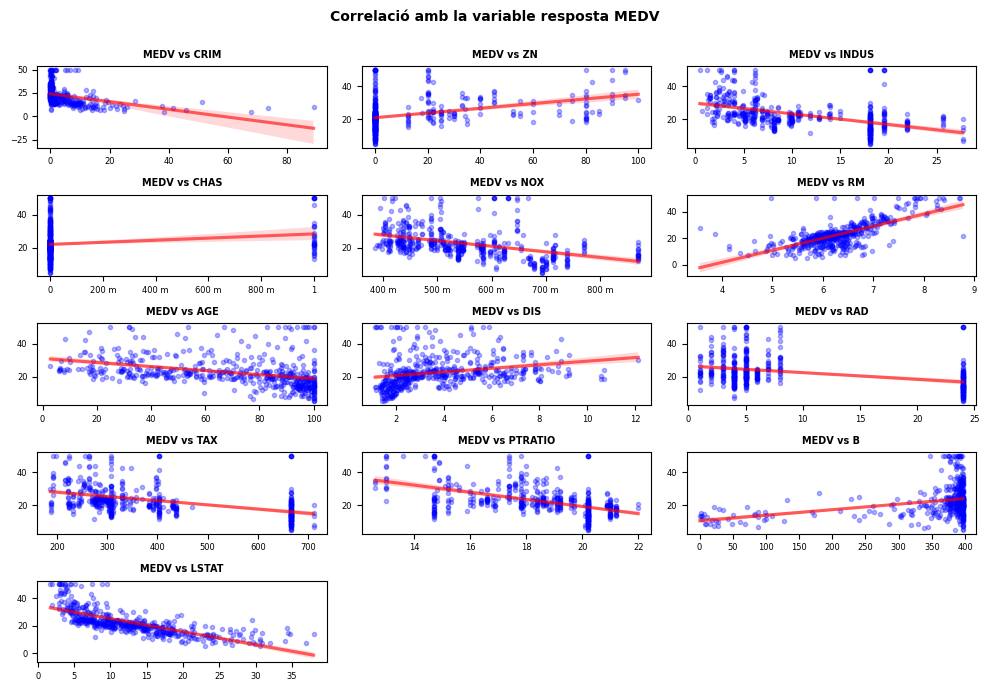

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 7))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float32', 'int32']).columns
columnas_numeric = columnas_numeric.drop('MEDV')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['MEDV'],
        color       = "blue",
        marker      = '.',
        scatter_kws = {"alpha":0.3},
        line_kws    = {"color":"r","alpha":0.6},
        ax          = axes[i]
    )
    axes[i].set_title(f"MEDV vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminem els axes buits
for i in [13, 14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlació amb la variable resposta MEDV', fontsize = 10, fontweight = "bold");

### Correlació entre variables

Si les variables predictores están altament correlacionades, poden donar error en alguns models. 

In [8]:
#Matriu de correlació
corr_df = df.corr(method='pearson')
print("MATRIU DE CORRELACIÓ\n\n", corr_df)

MATRIU DE CORRELACIÓ

              CRIM       ZN      INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355502  0.261515   
B    

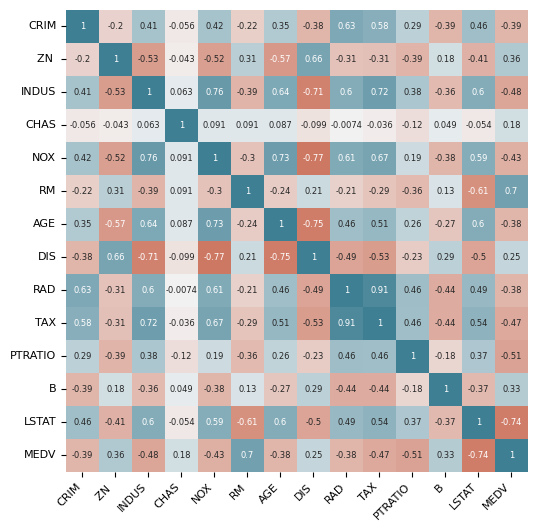

In [13]:
#Heatmap de matriu de correlació

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_df,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

### Divisió Train i Test

Avaluar la capacitat predictiva d'un model consisteix a comprovar com de properes són les seves prediccions als veritables valors de la variable resposta. Pertant, per quantificar-ho, cal disposar d'un conjunt d'observacions, de les quals es conegui la variable resposta, però que el model no hagi participat en l'ajustament. Amb aquesta finalitat, es divideixen les dades en un conjunt dʻentrenament i un conjunt de test. La mida adequada de les particions depèn en gran mesura de la quantitat de dades disponibles i en l'estimació de l'error, 80%-20% sol donar bons resultats. El repartiment s'ha de fer de manera aleatòria o aleatòria-estratificada.

In [4]:
#Devidim el conjunt de dades en 2 grups: el 80% per training i el 20% per testing grup

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   df.drop(columns=['MEDV'], axis ='columns'), 
                                   df['MEDV'], 
                                   test_size=0.2, 
                                   random_state=42, 
                                   shuffle=True
                                   )  

In [5]:
X_d1, y_d2 = [X_train, X_test], [y_train, y_test]
Xy_data = X_d1 + y_d2

df2=df.drop(columns=['MEDV'])

X_train.name, X_test.name = "X_train", "X_test"
y_train.name, y_test.name = "y_train", "y_test"

# verifiquem percentatge de dades d'entrenament i dimensions dels conjunts
print(f"Percentatge train: {round(100 * len(X_train) / (len(df2)), ndigits=2)}%")
for data in Xy_data: print(f"Dimensions {data.name}: {data.shape}")

Percentatge train: 79.84%
Dimensions X_train: (404, 13)
Dimensions X_test: (102, 13)
Dimensions y_train: (404,)
Dimensions y_test: (102,)


In [6]:
print(f"X_train", X_train.shape)
print(f"X_test", X_test.shape)

X_train (404, 13)
X_test (102, 13)


In [71]:
print("Conjunt de dades Train")
print("______________________")

X_train.describe().T

Conjunt de dades Train
______________________


,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609124,8.875057,0.00906,0.081437,0.261390,3.202962,88.976196
ZN,404.0,11.569307,23.152452,0.00000,0.000000,0.000000,20.000000,100.000000
INDUS,404.0,10.985050,6.894617,0.74000,5.130000,8.560000,18.100000,27.740000
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.538000,0.631000,0.871000
RM,404.0,6.315893,0.709452,3.86300,5.890500,6.210000,6.636750,8.780000
AGE,404.0,68.556465,27.994925,2.90000,45.549999,77.699997,93.650000,100.000000
DIS,404.0,3.808196,2.131226,1.12960,2.087875,3.175750,5.400800,12.126500
RAD,404.0,9.356436,8.589721,1.00000,4.000000,5.000000,12.000000,24.000000
TAX,404.0,404.032166,166.172516,187.00000,279.000000,330.000000,666.000000,711.000000


In [70]:
print("Conjunt de dades Test")
print("_____________________")

X_test.describe().T

Conjunt de dades Test
_____________________


,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,3.630947,7.459607,0.00632,0.087368,0.209885,4.522473,45.746101
ZN,102.0,10.549020,24.083239,0.00000,0.000000,0.000000,0.000000,95.000000
INDUS,102.0,11.737741,6.722577,0.46000,6.102500,10.590000,18.100000,27.740000
CHAS,102.0,0.058824,0.236456,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,102.0,0.547609,0.108602,0.39200,0.448250,0.532000,0.621500,0.871000
RM,102.0,6.160834,0.663825,3.56100,5.870250,6.170500,6.479250,8.034000
AGE,102.0,68.648033,28.890867,6.20000,43.800001,74.700001,95.225002,100.000000
DIS,102.0,3.742948,2.010749,1.16910,2.263950,3.353400,4.764825,10.710300
RAD,102.0,10.313725,9.161889,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,102.0,424.892151,177.462463,188.00000,281.750000,345.000000,666.000000,711.000000


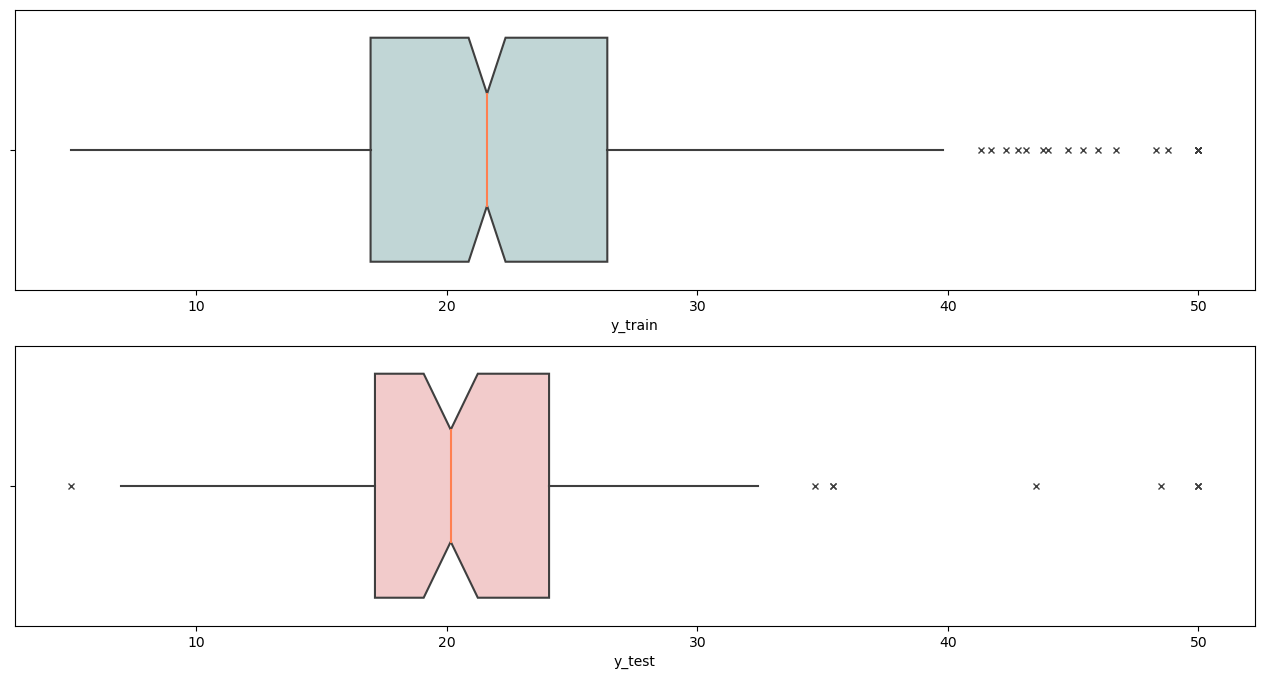

In [31]:
#visualitzem gràficament la comparativa entre els grups y_train i y_test

plt.figure(figsize=(16,8))

plt.subplot(2, 1, 1)

sns.boxplot(x=y_train, notch=True, showcaps=False, 
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .6, .5)},
    medianprops={"color": "coral"}, 
)


plt.subplot(2, 1, 2)

sns.boxplot(x=y_test, notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.9, .6, .6, .5)},
    medianprops={"color": "coral"},
)

plt.show()

In [53]:
def comparar_Densidad(train, test, variable):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Comparativa del grup Train i Test de la variable: '+ variable)
    sns.kdeplot(data=train, x=variable, ax=ax1).set_ylabel('Train Density')
    sns.kdeplot(data=test, x=variable, ax=ax2).set_ylabel('Test Density')

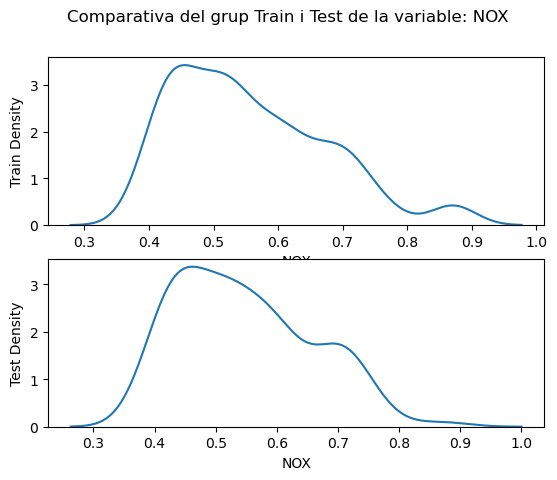

In [54]:
comparar_Densidad(X_train, X_test, 'NOX')

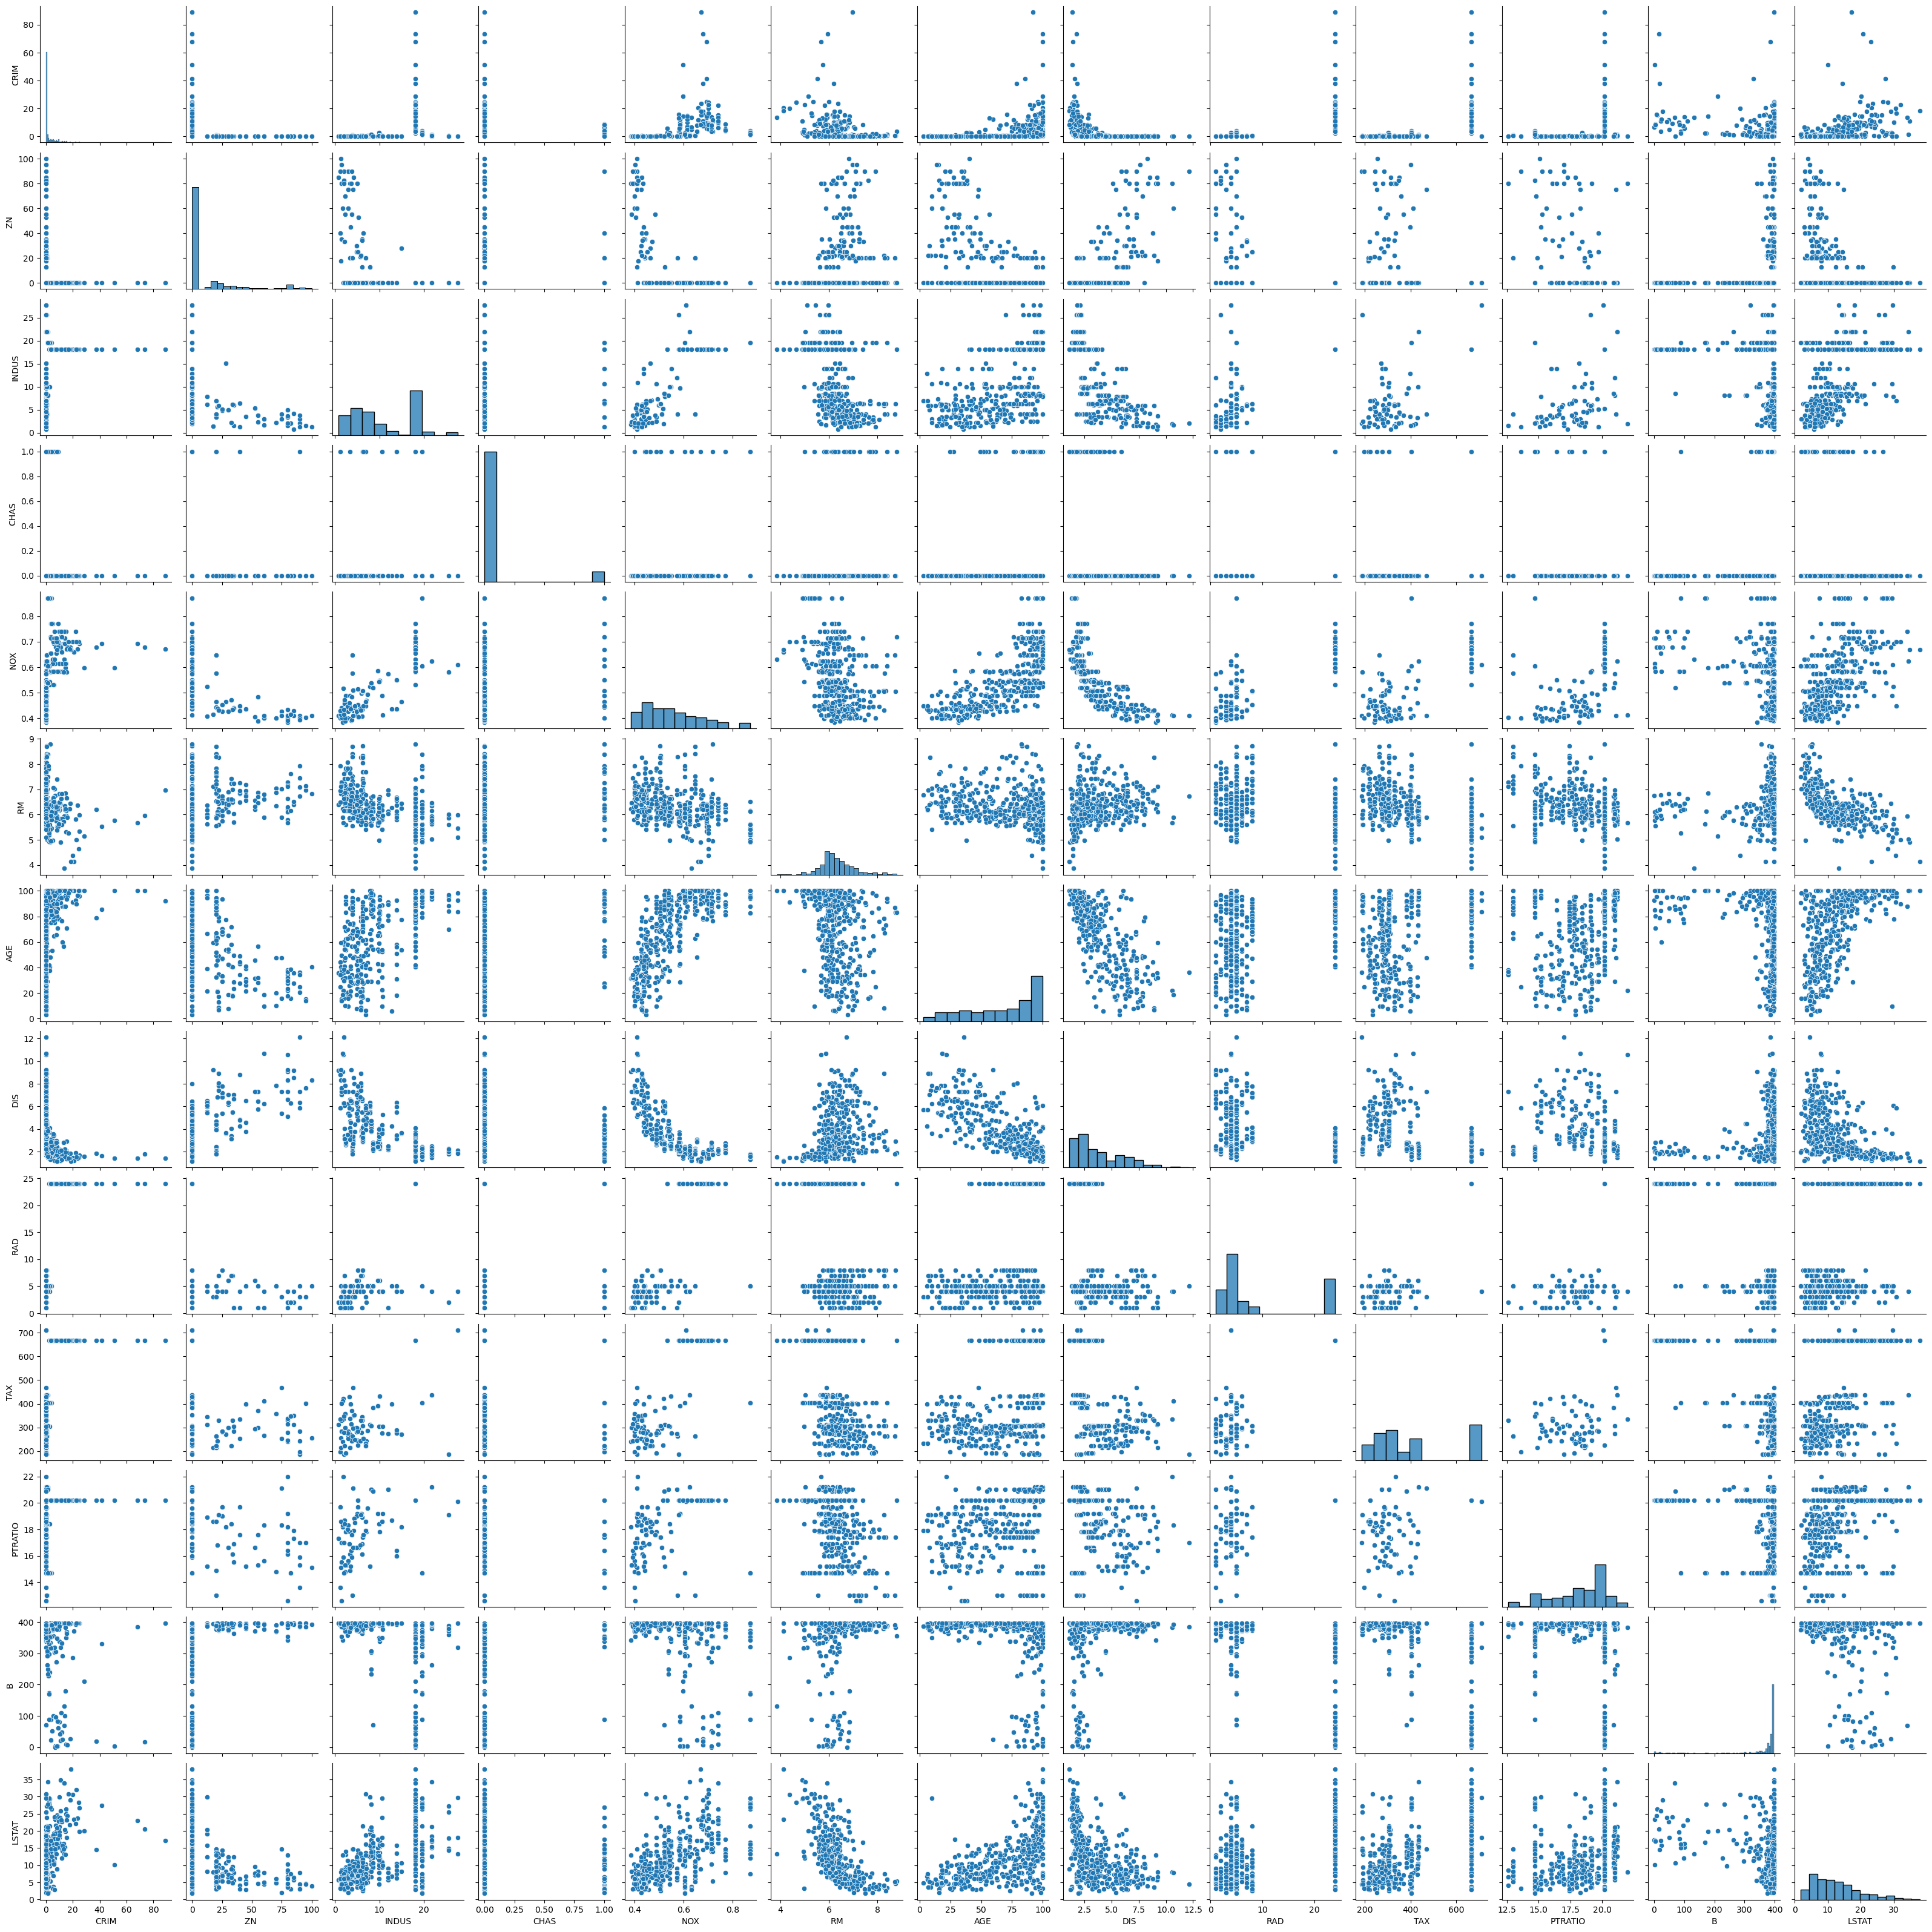

In [21]:
sns.pairplot(X_train)
plt.show()

## Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [7]:
#fem una còpia del conjunt de dades i verifiquem

X_train_transf = X_train.copy()
print(f"X_train", X_train_transf.shape)

X_test_transf = X_test.copy()
print(f"X_test", X_test_transf.shape)

X_train (404, 13)
X_test (102, 13)


In [8]:
#funció per observar els valors únics de cada variable i grup
df2=df.drop(columns=['MEDV'])
X_col = df2.columns.tolist()

def obtenir_valors_unics(df, columnes, total_columns=False, binary=False):
    total = 0
    for v in columnes:
        num_values = len(df[v].unique().tolist())
        if binary == False: total += num_values
        print(f"Variable {v}: {num_values} valors únics ")
        if binary == True:
            bin_size = math.ceil(math.log2(num_values))
            total += bin_size
            print(f"Número de valors necessaris {num_values} valors únics {bin_size}\n")
    if total_columns: print(f"Total de columnes {total}")
        
print("TRAIN")
print("_____\n")
obtenir_valors_unics(X_train_transf,X_col)
print("\nTEST")
print("______\n")
obtenir_valors_unics(X_test_transf, X_col )
print("\nDATASET")
print("_________\n")
obtenir_valors_unics(df, X_col )

TRAIN
_____

Variable CRIM: 403 valors únics 
Variable ZN : 25 valors únics 
Variable INDUS: 72 valors únics 
Variable CHAS: 2 valors únics 
Variable NOX: 80 valors únics 
Variable RM: 366 valors únics 
Variable AGE: 304 valors únics 
Variable DIS: 336 valors únics 
Variable RAD: 9 valors únics 
Variable TAX: 64 valors únics 
Variable PTRATIO: 45 valors únics 
Variable B: 290 valors únics 
Variable LSTAT: 370 valors únics 

TEST
______

Variable CRIM: 102 valors únics 
Variable ZN : 14 valors únics 
Variable INDUS: 43 valors únics 
Variable CHAS: 2 valors únics 
Variable NOX: 53 valors únics 
Variable RM: 99 valors únics 
Variable AGE: 86 valors únics 
Variable DIS: 96 valors únics 
Variable RAD: 9 valors únics 
Variable TAX: 39 valors únics 
Variable PTRATIO: 31 valors únics 
Variable B: 73 valors únics 
Variable LSTAT: 100 valors únics 

DATASET
_________

Variable CRIM: 504 valors únics 
Variable ZN : 26 valors únics 
Variable INDUS: 76 valors únics 
Variable CHAS: 2 valors únics 
V

### get_dummies

In [12]:
#variable binaria CHAS el seu valor será 1 si l'habitatge es troba en els límits del tram del riu Charles River i 0 en cas contrari.
X_train_transf['CHAS'].unique().tolist()

[0, 1]

In [9]:
CHAS_dum = pd.get_dummies(X_train_transf.CHAS, prefix="CHAS")
CHAS_dum

,CHAS_0,CHAS_1
477,1,0
15,1,0
332,1,0
423,1,0
19,1,0
...,...,...
106,1,0
270,1,0
348,1,0
435,1,0


In [10]:
X_train_transf = X_train_transf.join(CHAS_dum)
X_train_transf = X_train_transf.drop(["CHAS"], axis=1)
X_train_transf

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0,CHAS_1
477,15.02340,0.0,18.10,0.6140,5.304,97.300003,2.1007,24,666.0,20.200001,349.480011,24.910000,1,0
15,0.62739,0.0,8.14,0.5380,5.834,56.500000,4.4986,4,307.0,21.000000,395.619995,8.470000,1,0
332,0.03466,35.0,6.06,0.4379,6.031,23.299999,6.6407,1,304.0,16.900000,362.250000,7.830000,1,0
423,7.05042,0.0,18.10,0.6140,6.103,85.099998,2.0218,24,666.0,20.200001,2.520000,23.290001,1,0
19,0.72580,0.0,8.14,0.5380,5.727,69.500000,3.7965,4,307.0,21.000000,390.950012,11.280000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.5200,5.836,91.900002,2.2110,5,384.0,20.900000,395.670013,18.660000,1,0
270,0.29916,20.0,6.96,0.4640,5.856,42.099998,4.4290,3,223.0,18.600000,388.649994,13.000000,1,0
348,0.01501,80.0,2.01,0.4350,6.635,29.700001,8.3440,4,280.0,17.000000,390.940002,5.990000,1,0
435,11.16040,0.0,18.10,0.7400,6.629,94.599998,2.1247,24,666.0,20.200001,109.849998,23.270000,1,0


In [15]:
X_train_transf['RAD'].unique().tolist()

[24, 4, 1, 5, 2, 3, 8, 6, 7]

In [11]:
RAD_dum = pd.get_dummies(X_train_transf.RAD, prefix="RAD")
RAD_dum

,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
477,0,0,0,0,0,0,0,0,1
15,0,0,0,1,0,0,0,0,0
332,1,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,1
19,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,1,0,0,0,0
270,0,0,1,0,0,0,0,0,0
348,0,0,0,1,0,0,0,0,0
435,0,0,0,0,0,0,0,0,1


In [12]:
X_train_transf = X_train_transf.join(RAD_dum)
X_train_transf = X_train_transf.drop(["RAD"], axis=1)
X_train_transf

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
477,15.02340,0.0,18.10,0.6140,5.304,97.300003,2.1007,666.0,20.200001,349.480011,...,0,0,0,0,0,0,0,0,0,1
15,0.62739,0.0,8.14,0.5380,5.834,56.500000,4.4986,307.0,21.000000,395.619995,...,0,0,0,0,1,0,0,0,0,0
332,0.03466,35.0,6.06,0.4379,6.031,23.299999,6.6407,304.0,16.900000,362.250000,...,0,1,0,0,0,0,0,0,0,0
423,7.05042,0.0,18.10,0.6140,6.103,85.099998,2.0218,666.0,20.200001,2.520000,...,0,0,0,0,0,0,0,0,0,1
19,0.72580,0.0,8.14,0.5380,5.727,69.500000,3.7965,307.0,21.000000,390.950012,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.5200,5.836,91.900002,2.2110,384.0,20.900000,395.670013,...,0,0,0,0,0,1,0,0,0,0
270,0.29916,20.0,6.96,0.4640,5.856,42.099998,4.4290,223.0,18.600000,388.649994,...,0,0,0,1,0,0,0,0,0,0
348,0.01501,80.0,2.01,0.4350,6.635,29.700001,8.3440,280.0,17.000000,390.940002,...,0,0,0,0,1,0,0,0,0,0
435,11.16040,0.0,18.10,0.7400,6.629,94.599998,2.1247,666.0,20.200001,109.849998,...,0,0,0,0,0,0,0,0,0,1


In [13]:
print(f"X_train", X_train_transf.shape)

X_train (404, 22)


### Codificació binària

Calculem el nombre de noves columnes que tindrem per variable, i si els apliquem la codificació binària

In [14]:
import math

#conjunt de dades X_train sense transformar
X_train2 = X_train.copy()
col_bin = X_train2[["INDUS", "NOX", "CHAS", "RAD", "TAX", "PTRATIO"]]

obtenir_valors_unics(X_train2, col_bin, total_columns=True, binary=True)

Variable INDUS: 72 valors únics 
Número de valors necessaris 72 valors únics 7

Variable NOX: 80 valors únics 
Número de valors necessaris 80 valors únics 7

Variable CHAS: 2 valors únics 
Número de valors necessaris 2 valors únics 1

Variable RAD: 9 valors únics 
Número de valors necessaris 9 valors únics 4

Variable TAX: 64 valors únics 
Número de valors necessaris 64 valors únics 6

Variable PTRATIO: 45 valors únics 
Número de valors necessaris 45 valors únics 6

Total de columnes 31


### Transformació polinòmica

En el conjunt d'entrenament es rep com entrada característique polinòmiques que al transformar el model, retorna totes les possibles combinaciones entre les variables, així com el grau al instanciar la clase, amb l'objectiu de millorar el rendiment del model. Pertant, la transformació polinòmica generarà moltes noves variables (columnes) d'entrades adicionals.

In [15]:
#calculem les noves columnes que s'haurien de generar en aplicar la transformació polinòmica

X_train3 = X_train.copy()
data = X_train3[["CRIM", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "LSTAT"]]  

n = len(data.columns)
print(f"Noves columnes de bias: 1")
print(f"Variables inicials: {n}")
print(f"Columnes generades de les combinacions: {math.comb(n, 2)}")
print(f"Columnes generades al quadrat ^2:  {n}")
print(f"Total columnes per les {n} variables: {math.comb(n, 2) + n*2 + 1}")

Noves columnes de bias: 1
Variables inicials: 11
Columnes generades de les combinacions: 55
Columnes generades al quadrat ^2:  11
Total columnes per les 11 variables: 78


In [57]:
data

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
477,15.02340,18.10,0,0.6140,5.304,97.300003,2.1007,24,666.0,20.200001,24.910000
15,0.62739,8.14,0,0.5380,5.834,56.500000,4.4986,4,307.0,21.000000,8.470000
332,0.03466,6.06,0,0.4379,6.031,23.299999,6.6407,1,304.0,16.900000,7.830000
423,7.05042,18.10,0,0.6140,6.103,85.099998,2.0218,24,666.0,20.200001,23.290001
19,0.72580,8.14,0,0.5380,5.727,69.500000,3.7965,4,307.0,21.000000,11.280000
...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0,0.5200,5.836,91.900002,2.2110,5,384.0,20.900000,18.660000
270,0.29916,6.96,0,0.4640,5.856,42.099998,4.4290,3,223.0,18.600000,13.000000
348,0.01501,2.01,0,0.4350,6.635,29.700001,8.3440,4,280.0,17.000000,5.990000
435,11.16040,18.10,0,0.7400,6.629,94.599998,2.1247,24,666.0,20.200001,23.270000


In [16]:
columns_list = (["CRIM", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "LSTAT"])
columns_list

['CRIM',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(data)

print("Num. de columnes noves: ", poly.n_output_features_)
data = poly.transform(data)

column_poly = poly.get_feature_names_out()
data = pd.DataFrame(data, columns=column_poly)

print("Dimensió:", data.shape)

X_train3 = X_train3.drop(columns=columns_list).join(data)
X_train3.shape

Num. de columnes noves:  77
Dimensió: (404, 77)


(404, 79)

In [18]:
X_train3.columns

Index(['ZN ', 'B', 'CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'CRIM^2', 'CRIM INDUS', 'CRIM CHAS',
       'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS', 'CRIM RAD', 'CRIM TAX',
       'CRIM PTRATIO', 'CRIM LSTAT', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX',
       'INDUS RM', 'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX',
       'INDUS PTRATIO', 'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM',
       'CHAS AGE', 'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX LSTAT', 'RM^2', 'RM AGE', 'RM DIS',
       'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM LSTAT', 'AGE^2', 'AGE DIS',
       'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE LSTAT', 'DIS^2', 'DIS RAD',
       'DIS TAX', 'DIS PTRATIO', 'DIS LSTAT', 'RAD^2', 'RAD TAX',
       'RAD PTRATIO', 'RAD LSTAT', 'TAX^2', 'TAX PTRATIO', 'TAX LSTAT',
       'PTRATIO^2', 'PTRATIO LSTAT', 'LSTAT^2'],


In [49]:
X_train3.describe()

,ZN,B,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,RAD^2,RAD TAX,RAD PTRATIO,RAD LSTAT,TAX^2,TAX PTRATIO,TAX LSTAT,PTRATIO^2,PTRATIO LSTAT,LSTAT^2
count,404.000000,404.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,...,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,11.569307,356.278259,3.703959,10.759635,0.075988,0.554288,6.297638,67.988450,3.890065,9.161094,...,155.653495,4920.316109,176.381767,146.465380,184912.392097,7438.199522,5675.887938,340.112927,236.682554,211.521059
std,23.152452,91.566605,9.291680,6.853069,0.265382,0.119823,0.704912,28.026730,2.184268,8.482130,...,237.059904,6253.963389,175.707989,195.531624,152261.450556,3634.453054,5072.442284,78.079993,146.996053,237.797912
min,0.000000,0.320000,0.009060,0.740000,0.000000,0.385000,3.863000,2.900000,1.137000,1.000000,...,1.000000,198.000000,13.600000,3.160000,34969.000000,2692.800076,498.960005,158.760010,28.223999,3.686400
25%,0.000000,375.472488,0.078960,4.950000,0.000000,0.448000,5.888000,44.400002,2.065100,4.000000,...,16.000000,1120.000000,70.400002,30.040001,76729.000000,4863.800112,2028.819941,282.239974,119.047994,45.292900
50%,0.000000,391.304993,0.251990,8.140000,0.000000,0.524000,6.195000,77.000000,3.317500,5.000000,...,25.000000,1758.000000,84.000000,54.520000,108241.000000,5924.099923,3370.840057,345.960014,194.496010,120.340906
75%,20.000000,395.754997,2.733970,18.100000,0.000000,0.631000,6.630000,93.800003,5.491700,8.000000,...,64.000000,2592.000000,157.600006,134.099998,190969.000000,9264.400333,8067.019600,408.040031,332.088023,285.609987
max,100.000000,396.899994,88.976196,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,...,576.000000,15984.000000,484.800018,911.280029,505521.000000,14291.100271,25288.020813,484.000000,766.994054,1441.720993


### Estandarització de les variables

En la standarització aconseguim que les variables tinguin un valor promig proper a '0' i una desviació estándard a '1'.

Yi = (Xi - Xmitja) / desviació sestándar de la variable

In [18]:
standardscaler = preprocessing.StandardScaler()
X_train3_scaled = pd.DataFrame(standardscaler.fit_transform(X_train3), columns=X_train3.columns)
X_train3_scaled.describe()

,ZN,B,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,RAD^2,RAD TAX,RAD PTRATIO,RAD LSTAT,TAX^2,TAX PTRATIO,TAX LSTAT,PTRATIO^2,PTRATIO LSTAT,LSTAT^2
count,4.040000e+02,4.040000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,...,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02
mean,8.354153e-17,-7.254923e-17,-3.543265e-18,8.233873e-17,1.039358e-16,7.221511e-17,-5.992336e-16,8.402600e-17,-8.503836e-17,1.616404e-16,...,4.353154e-17,2.497158e-17,-3.644501e-17,-1.889741e-17,7.896419e-17,-1.181088e-17,5.635479e-17,-2.891979e-16,-8.065146e-17,-6.647840e-17
std,1.001240e+00,1.001240e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,...,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00,1.001523e+00
min,-5.003201e-01,-3.892249e+00,-3.982625e-01,-1.464293e+00,-2.867697e-01,-1.414971e+00,-3.459078e+00,-2.325908e+00,-1.262326e+00,-9.636171e-01,...,-6.533752e-01,-7.562419e-01,-9.278447e-01,-7.340177e-01,-9.862758e-01,-1.307660e+00,-1.022153e+00,-2.326193e+00,-1.420284e+00,-8.753283e-01
25%,-5.003201e-01,2.098796e-01,-3.907281e-01,-8.490335e-01,-2.867697e-01,-8.883934e-01,-5.820047e-01,-8.429231e-01,-8.367767e-01,-6.093936e-01,...,-5.900037e-01,-6.085908e-01,-6.040886e-01,-5.963369e-01,-7.115930e-01,-7.094110e-01,-7.200916e-01,-7.423298e-01,-8.014756e-01,-7.000960e-01
50%,-5.003201e-01,3.830011e-01,-3.720777e-01,-3.828395e-01,-2.867697e-01,-2.531572e-01,-1.458259e-01,3.220239e-01,-2.625304e-01,-4.913191e-01,...,-5.519808e-01,-5.064201e-01,-5.265696e-01,-4.709491e-01,-5.043179e-01,-4.172308e-01,-4.551178e-01,7.499993e-02,-2.874282e-01,-3.840195e-01
75%,3.645893e-01,4.316600e-01,-1.045523e-01,1.072738e+00,-2.867697e-01,6.411888e-01,4.722120e-01,9.223648e-01,7.343765e-01,-1.370956e-01,...,-3.872148e-01,-3.728616e-01,-1.070547e-01,-6.333613e-02,3.983827e-02,5.032346e-01,4.721146e-01,8.712933e-01,6.500229e-01,3.120371e-01
max,3.824227e+00,4.441800e-01,9.191247e+00,2.481550e+00,3.487119e+00,2.647199e+00,3.526882e+00,1.143919e+00,3.776543e+00,1.752096e+00,...,1.775867e+00,1.771762e+00,1.757962e+00,3.917421e+00,2.108853e+00,1.888410e+00,3.872298e+00,1.845623e+00,3.613153e+00,5.181180e+00


In [19]:
print(type(X_train3))
print(type(X_train3_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [89]:
data.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'CRIM^2', 'CRIM INDUS', 'CRIM CHAS', 'CRIM NOX',
       'CRIM RM', 'CRIM AGE', 'CRIM DIS', 'CRIM RAD', 'CRIM TAX',
       'CRIM PTRATIO', 'CRIM LSTAT', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX',
       'INDUS RM', 'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX',
       'INDUS PTRATIO', 'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM',
       'CHAS AGE', 'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX LSTAT', 'RM^2', 'RM AGE', 'RM DIS',
       'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM LSTAT', 'AGE^2', 'AGE DIS',
       'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE LSTAT', 'DIS^2', 'DIS RAD',
       'DIS TAX', 'DIS PTRATIO', 'DIS LSTAT', 'RAD^2', 'RAD TAX',
       'RAD PTRATIO', 'RAD LSTAT', 'TAX^2', 'TAX PTRATIO', 'TAX LSTAT',
       'PTRATIO^2', 'PTRATIO LSTAT', 'LSTAT^2'],
      dtype=

In [20]:
data_vis = data.join(X_train3_scaled[["CRIM", "CRIM^2"]].add_suffix("_estandarized"))
data_vis.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'CRIM^2', 'CRIM INDUS', 'CRIM CHAS', 'CRIM NOX',
       'CRIM RM', 'CRIM AGE', 'CRIM DIS', 'CRIM RAD', 'CRIM TAX',
       'CRIM PTRATIO', 'CRIM LSTAT', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX',
       'INDUS RM', 'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX',
       'INDUS PTRATIO', 'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM',
       'CHAS AGE', 'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX LSTAT', 'RM^2', 'RM AGE', 'RM DIS',
       'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM LSTAT', 'AGE^2', 'AGE DIS',
       'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE LSTAT', 'DIS^2', 'DIS RAD',
       'DIS TAX', 'DIS PTRATIO', 'DIS LSTAT', 'RAD^2', 'RAD TAX',
       'RAD PTRATIO', 'RAD LSTAT', 'TAX^2', 'TAX PTRATIO', 'TAX LSTAT',
       'PTRATIO^2', 'PTRATIO LSTAT', 'LSTAT^2', 'CRIM_estanda

In [21]:
data_vis2 = data_vis[["CRIM", "CRIM^2", "CRIM_estandarized", "CRIM^2_estandarized"]]

In [22]:
print(type(data_vis2))

<class 'pandas.core.frame.DataFrame'>


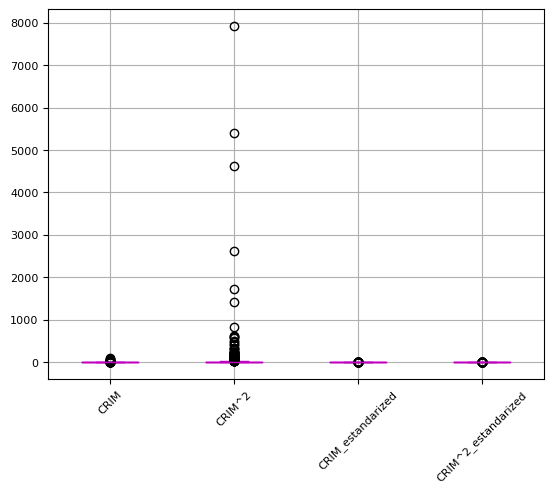

In [47]:
boxplot = data_vis2.boxplot(color="m", rot=45, fontsize=8)

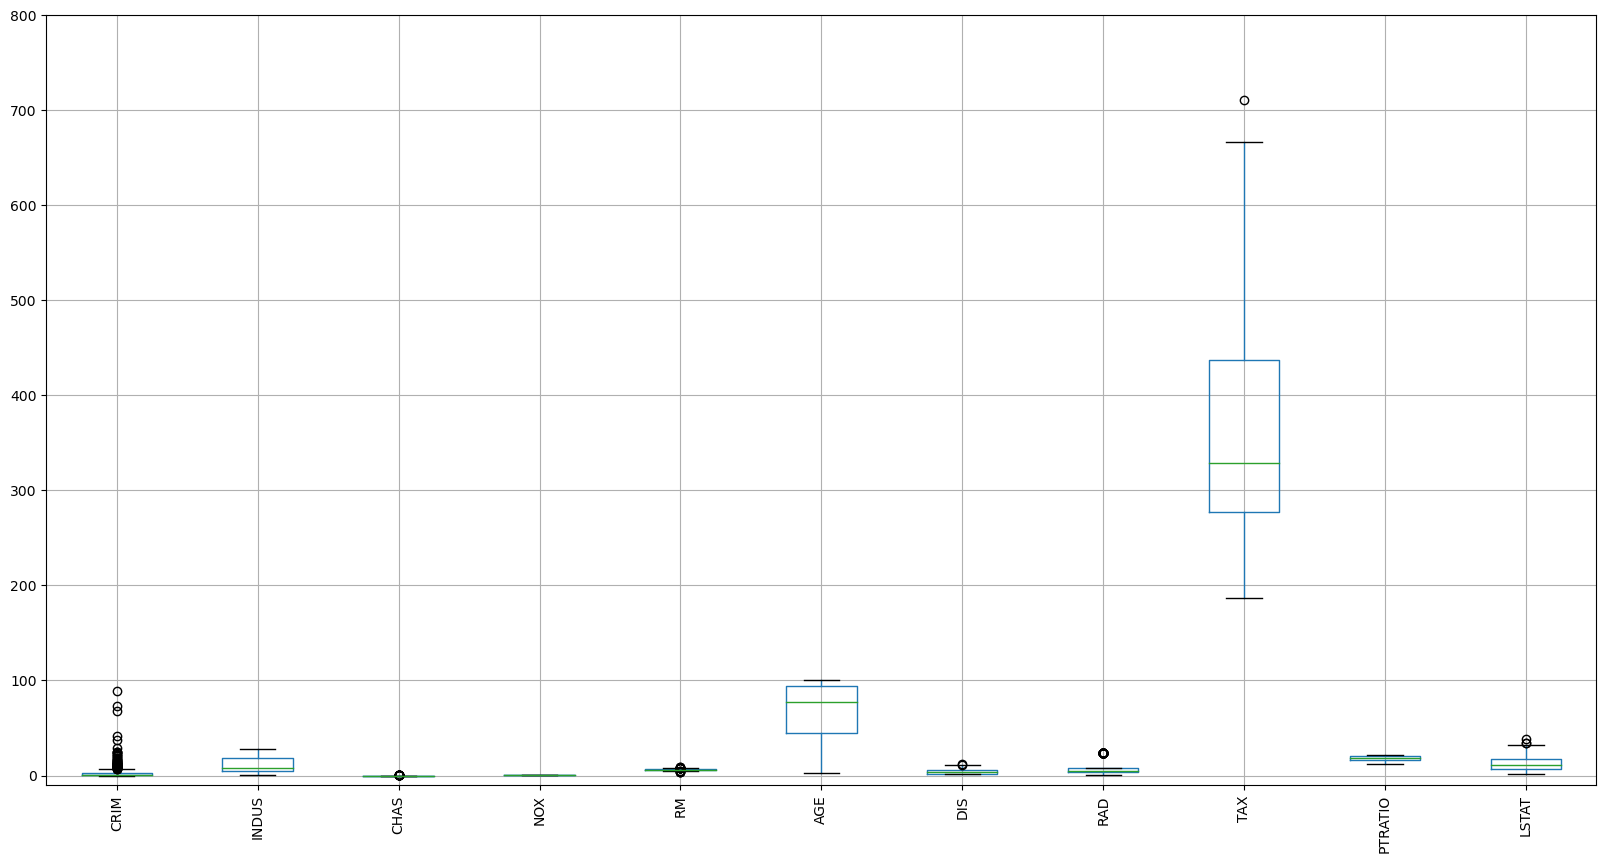

In [25]:
plt.figure(figsize=(20,10))
X_train3.boxplot(column=columns_list, rot=90)
plt.ylim(-10, 800)
plt.show()

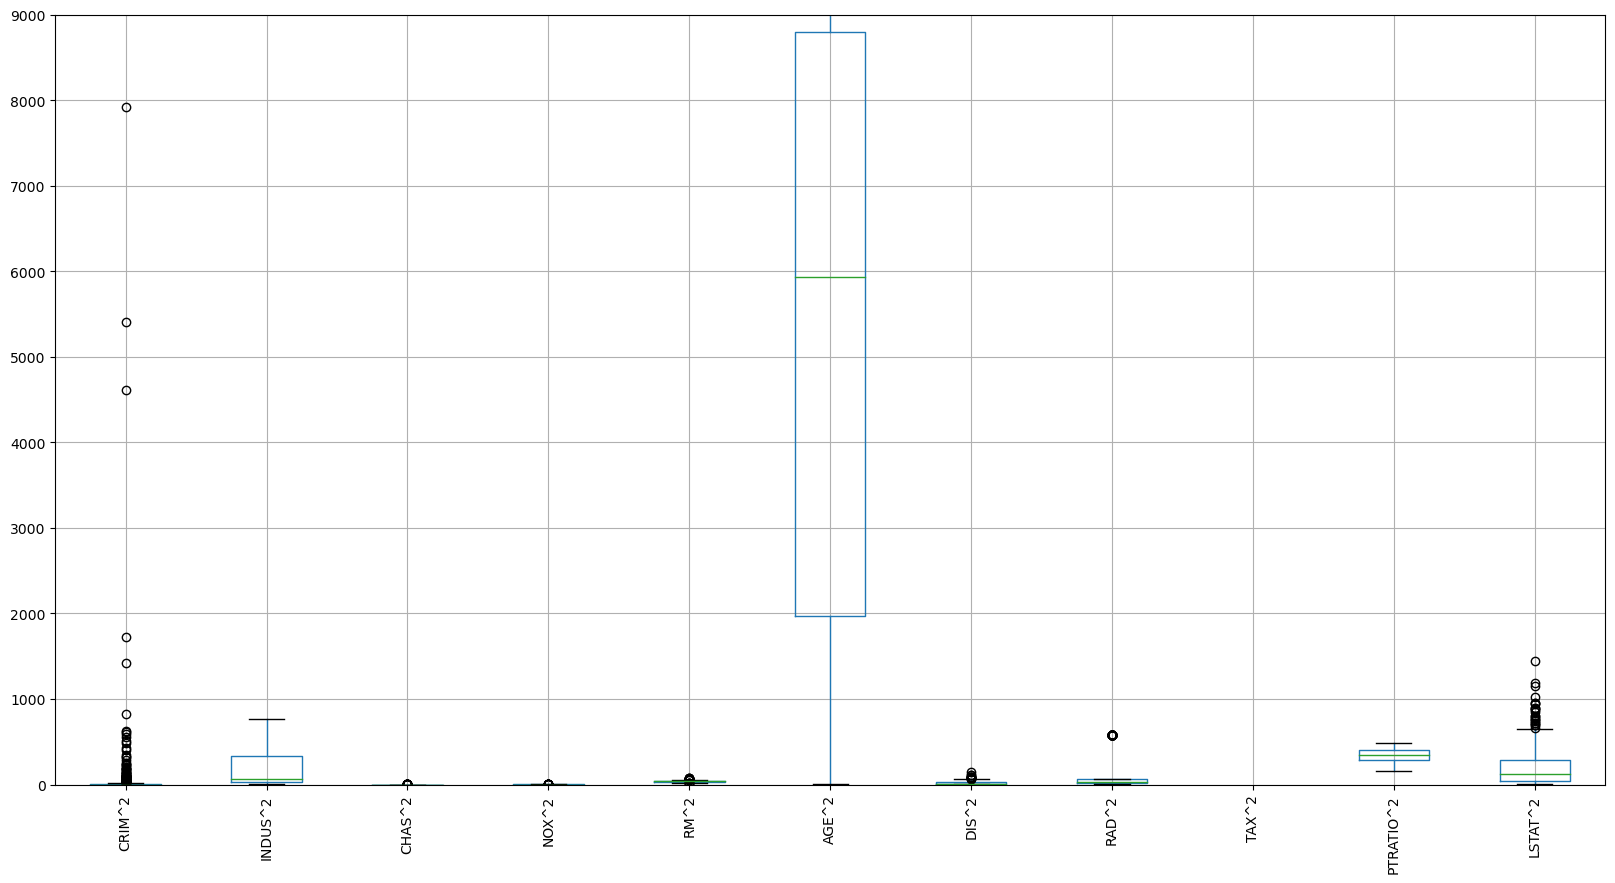

In [51]:
columns_2 = [col + "^2" for col in columns_list]

plt.figure(figsize=(20,10))
X_train3.boxplot(column=columns_2, rot=90)
plt.ylim(0, 9000)
plt.show()

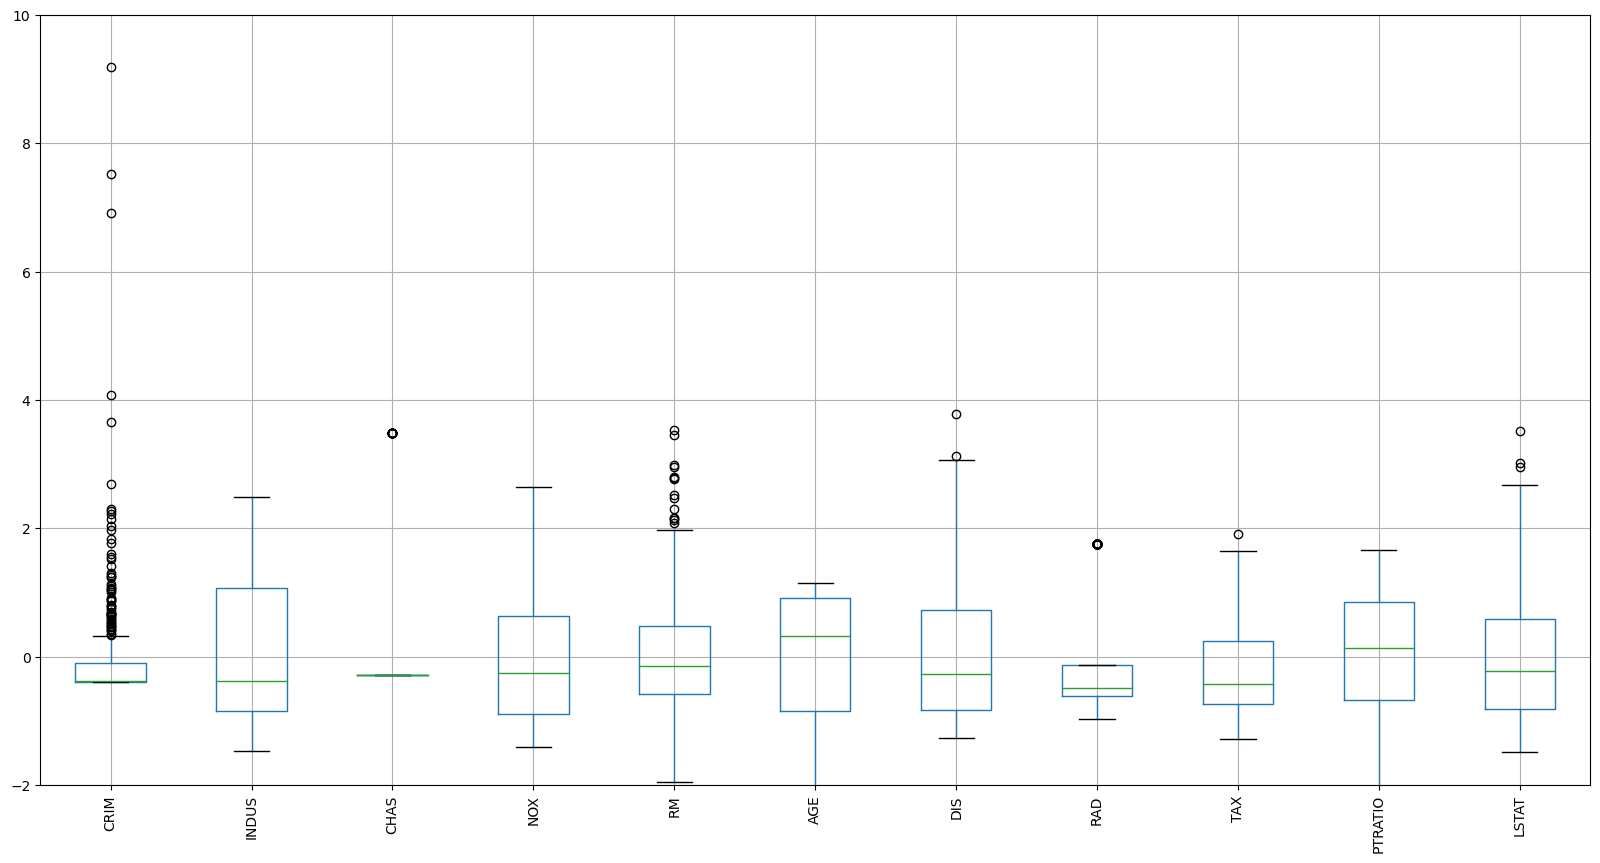

In [23]:
plt.figure(figsize=(20,10))
X_train3_scaled.boxplot(column=columns_list, rot=90)
plt.ylim(-2, 10)
plt.show()

In [ ]:
sns.pairplot(X_train3_scaled)
plt.show()

In [ ]:
import session_info
session_info.show()